In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import ast
import matplotlib.image as mpimg
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython import display
import matplotlib.image as mpimg

# Kino industrijos analizė

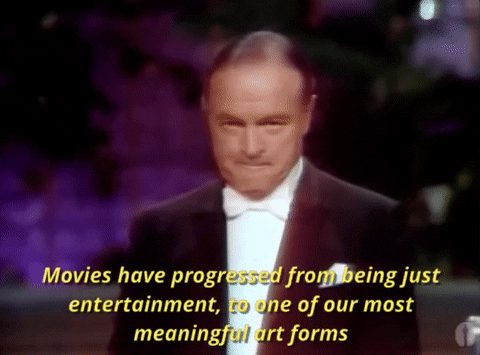

In [3]:
from pathlib import Path
gifPath = Path("D:\\giphy (3).gif")
with open(gifPath,'rb') as f:
    display.Image(data=f.read(), format='png')

## Duomenų rinkinio apžvalga

Duomenys yra paimti iš https://www.kaggle.com/ - didžiausios pasaulyje duomenų mokslo bendruomenės.
Duomenų rinkinį sudaro filmai, išleisti iki 2017 m. liepos mėn, suirinkti iš „MovieLens“  internetinės rekomendacijų sistemos, kuri rekomenduoja filmus žiūrėti savo vartotojams, atsižvelgiant į jų pasirinktus filmus, filtruojant narių filmų įvertinimus ir filmų peržiūras.

## Pagrindiniai iškelti klausimai

1. Kurie filmai daugiausiai uždirbo? Didžiausio biudžeto filmai?
2. Kurie filmai buvo nuostolingi?
5. Kurie režisieriai yra sukūrę daugiausiai filmų?
3. Kokio žanro filmų yra kuriama daugiausiai? 
4. Kokie žodžiai yra dažniausiai pasikartojantys filmų pavadinimuose?
5. Kurie filmai TMDB bendruomenės įvertinti geriausiai? 
6. Kaip kito filmų ilgis bėgant metams?
 
Hipotezė- Kino pramonę valdo vyrai?

## Duomenų valymas ir tvarkymas

In [4]:
meta = pd.read_csv('D:\\movies_metadata.csv')
meta.head()

D:\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
2                                   NaN  15602  tt0113228                en   
3                                   NaN  31357  tt0114885                en   
4                                   NaN  11862  tt0113041                en   

                original_title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                            overview  ... release_date  \
0  Led by Woody, Andy's toys live happily in his ...  ...   1995-10-30   
1  When siblings Judy and Peter discover an encha...  ...   1995-12-15   
2  A family wedding reignites the ancient feud be...  ...   1995-12-22   
3  Cheated on, mistreated and stepped on, the wom...  ...   1995-12-22   
4  Just when George Banks has recovered from his ...  ...   1995-02-10   

       revenue runtime                                   spoken_languages  \
0  373554033.0    81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1  262797249.0   104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
2          0.0   101.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3   81452156.0   127.0           [{'iso_639_1': 'en', 'name': 'English'}]   
4   76578911.0   106.0           [{'iso_639_1': 'en', 'name': 'English'}]   

     status                                            tagline  \
0  Released                                                NaN   
1  Released          Roll the dice and unleash the excitement!   
2  Released  Still Yelling. Still Fighting. Still Ready for...   
3  Released  Friends are the people who let you be yourself...   
4  Released  Just When His World Is Back To Normal... He's ...   

                         title  video vote_average vote_count  
0                    Toy Story  False          7.7     5415.0  
1                      Jumanji  False          6.9     2413.0  
2             Grumpier Old Men  False          6.5       92.0  
3            Waiting to Exhale  False          6.1       34.0  
4  Father of the Bride Part II  False          5.7      173.0  

[5 rows x 24 columns]

In [5]:
crew = pd.read_csv('D:\\credits.csv')
crew.head()

cast  \
0  [{'cast_id': 14, 'character': 'Woody (voice)',...   
1  [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2  [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3  [{'cast_id': 1, 'character': "Savannah 'Vannah...   
4  [{'cast_id': 1, 'character': 'George Banks', '...   

                                                crew     id  
0  [{'credit_id': '52fe4284c3a36847f8024f49', 'de...    862  
1  [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...   8844  
2  [{'credit_id': '52fe466a9251416c75077a89', 'de...  15602  
3  [{'credit_id': '52fe44779251416c91011acb', 'de...  31357  
4  [{'credit_id': '52fe44959251416c75039ed7', 'de...  11862

In [6]:
meta.id.drop_duplicates(keep = 'first', inplace=True)
crew.id.drop_duplicates(keep = 'first', inplace=True)

In [7]:
meta = meta.drop(meta[meta.original_language.str.count('\d') != 0].index)
crew = crew.drop(meta[meta.original_language.str.count('\d') != 0].index)

In [8]:
meta.id = meta.id.astype(int)

In [9]:
movies = meta.merge(crew, on='id')
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45527 entries, 0 to 45526
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45527 non-null  object 
 1   belongs_to_collection  4500 non-null   object 
 2   budget                 45527 non-null  object 
 3   genres                 45527 non-null  object 
 4   homepage               7792 non-null   object 
 5   id                     45527 non-null  int32  
 6   imdb_id                45510 non-null  object 
 7   original_language      45527 non-null  object 
 8   original_title         45527 non-null  object 
 9   overview               44574 non-null  object 
 10  popularity             45524 non-null  object 
 11  poster_path            45141 non-null  object 
 12  production_companies   45524 non-null  object 
 13  production_countries   45524 non-null  object 
 14  release_date           45440 non-null  object 
 15  re

In [10]:
movies_clean = movies.copy() # išsaugome sujungtą lentelę

In [11]:
movies_clean = movies_clean.drop(['imdb_id', 'tagline', 'video', 'homepage', 'adult','poster_path','belongs_to_collection','overview'], axis=1)
movies_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45527 entries, 0 to 45526
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                45527 non-null  object 
 1   genres                45527 non-null  object 
 2   id                    45527 non-null  int32  
 3   original_language     45527 non-null  object 
 4   original_title        45527 non-null  object 
 5   popularity            45524 non-null  object 
 6   production_companies  45524 non-null  object 
 7   production_countries  45524 non-null  object 
 8   release_date          45440 non-null  object 
 9   revenue               45524 non-null  float64
 10  runtime               45267 non-null  float64
 11  spoken_languages      45524 non-null  object 
 12  status                45443 non-null  object 
 13  title                 45524 non-null  object 
 14  vote_average          45524 non-null  float64
 15  vote_count         

In [12]:
movies_clean.drop(movies_clean[movies_clean['status'] != 'Released'].index, inplace=True) # Panaikinam filmus, kurių statusas yra kitoks nei 'released'

In [13]:
movies_clean = movies_clean.drop(['status'], axis=1) # Kadangi visi filmai yra su statusu 'released' panaikinam visai šį stulpelį

In [14]:
zero_runtime = movies_clean[movies_clean['runtime'] == 0]  # Panaikinam visus filmus kuriu runtime ir vote count yra 0
movies_clean.drop(zero_runtime.index, inplace=True)

zero_vote = movies_clean[movies_clean['vote_count'] == 0]
movies_clean.drop(zero_vote.index, inplace=True)

In [15]:
movies_clean[['popularity']]=movies_clean[['popularity']].astype(str).astype(float)  # Pakeičiam duomenų tipus
movies_clean[['budget']]=movies_clean[['budget']].astype(str).astype(float)
movies_clean['release_date']=pd.to_datetime(movies_clean['release_date'])

movies_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41065 entries, 0 to 45524
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                41065 non-null  float64       
 1   genres                41065 non-null  object        
 2   id                    41065 non-null  int32         
 3   original_language     41065 non-null  object        
 4   original_title        41065 non-null  object        
 5   popularity            41065 non-null  float64       
 6   production_companies  41065 non-null  object        
 7   production_countries  41065 non-null  object        
 8   release_date          41041 non-null  datetime64[ns]
 9   revenue               41065 non-null  float64       
 10  runtime               40911 non-null  float64       
 11  spoken_languages      41065 non-null  object        
 12  title                 41065 non-null  object        
 13  vote_average    

In [16]:
movies_clean[['title', 'genres', 'production_companies', 'production_countries', 'spoken_languages']].head(3)

title                                             genres  \
0         Toy Story  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1           Jumanji  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  Grumpier Old Men  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   

                                production_companies  \
0     [{'name': 'Pixar Animation Studios', 'id': 3}]   
1  [{'name': 'TriStar Pictures', 'id': 559}, {'na...   
2  [{'name': 'Warner Bros.', 'id': 6194}, {'name'...   

                                production_countries  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   
1  [{'iso_3166_1': 'US', 'name': 'United States o...   
2  [{'iso_3166_1': 'US', 'name': 'United States o...   

                                    spoken_languages  
0           [{'iso_639_1': 'en', 'name': 'English'}]  
1  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  
2           [{'iso_639_1': 'en', 'name': 'English'}]

In [17]:
# Pasiimam iš stulpelių production_countries,production_companies,spoken_languages ir genres  tik tą informaciją kuri mums bus reikalinga 

In [18]:
movies_clean['production_countries']=movies_clean.loc[movies_clean['production_countries'].notna(), 'production_countries'].str.split("'name': ").str[1].str.split("'").str[1]

In [19]:
movies_clean['production_companies']=movies_clean.loc[movies_clean['production_companies'].notna(), 'production_companies'].str.split("'name': ").str[1].str.split("'").str[1]

In [20]:
movies_clean['spoken_languages']=movies_clean.loc[movies_clean['spoken_languages'].notna(), 'spoken_languages'].str.split("'name': ").str[1].str.split("'").str[1]

In [21]:
movies_clean['genres']=movies_clean.loc[movies_clean['genres'].notna(), 'genres'].str.split("'name': ").str[1].str.split("'").str[1]

In [22]:
movies_clean['year'] = movies_clean['release_date'].dt.year
movies_clean['year'].value_counts()

2014.0    1780
2013.0    1759
2015.0    1699
2012.0    1576
2011.0    1525
          ... 
1878.0       1
1874.0       1
1887.0       1
1883.0       1
1893.0       1
Name: year, Length: 133, dtype: int64

In [23]:
movies_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41065 entries, 0 to 45524
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                41065 non-null  float64       
 1   genres                39663 non-null  object        
 2   id                    41065 non-null  int32         
 3   original_language     41065 non-null  object        
 4   original_title        41065 non-null  object        
 5   popularity            41065 non-null  float64       
 6   production_companies  31747 non-null  object        
 7   production_countries  36536 non-null  object        
 8   release_date          41041 non-null  datetime64[ns]
 9   revenue               41065 non-null  float64       
 10  runtime               40911 non-null  float64       
 11  spoken_languages      38584 non-null  object        
 12  title                 41065 non-null  object        
 13  vote_average    

In [24]:
movies_clean = movies_clean.dropna(how = 'any', subset = ['genres'])

In [25]:
movies_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39663 entries, 0 to 45524
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                39663 non-null  float64       
 1   genres                39663 non-null  object        
 2   id                    39663 non-null  int32         
 3   original_language     39663 non-null  object        
 4   original_title        39663 non-null  object        
 5   popularity            39663 non-null  float64       
 6   production_companies  31502 non-null  object        
 7   production_countries  35944 non-null  object        
 8   release_date          39654 non-null  datetime64[ns]
 9   revenue               39663 non-null  float64       
 10  runtime               39546 non-null  float64       
 11  spoken_languages      37734 non-null  object        
 12  title                 39663 non-null  object        
 13  vote_average    

In [26]:
movies_clean = movies_clean.dropna(how = 'any', subset = ['production_companies','production_countries'])

In [27]:
movies_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31079 entries, 0 to 45524
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                31079 non-null  float64       
 1   genres                31079 non-null  object        
 2   id                    31079 non-null  int32         
 3   original_language     31079 non-null  object        
 4   original_title        31079 non-null  object        
 5   popularity            31079 non-null  float64       
 6   production_companies  31079 non-null  object        
 7   production_countries  31079 non-null  object        
 8   release_date          31078 non-null  datetime64[ns]
 9   revenue               31079 non-null  float64       
 10  runtime               31029 non-null  float64       
 11  spoken_languages      30568 non-null  object        
 12  title                 31079 non-null  object        
 13  vote_average    

In [28]:
movies_clean = movies_clean.dropna(how = 'any', subset = ['release_date','runtime','spoken_languages','release_date','year'  ])

In [29]:
movies_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30528 entries, 0 to 45524
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                30528 non-null  float64       
 1   genres                30528 non-null  object        
 2   id                    30528 non-null  int32         
 3   original_language     30528 non-null  object        
 4   original_title        30528 non-null  object        
 5   popularity            30528 non-null  float64       
 6   production_companies  30528 non-null  object        
 7   production_countries  30528 non-null  object        
 8   release_date          30528 non-null  datetime64[ns]
 9   revenue               30528 non-null  float64       
 10  runtime               30528 non-null  float64       
 11  spoken_languages      30528 non-null  object        
 12  title                 30528 non-null  object        
 13  vote_average    

In [30]:
movies_clean['year']=movies_clean[['year']].astype(float).astype(int)

In [31]:
movies_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30528 entries, 0 to 45524
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                30528 non-null  float64       
 1   genres                30528 non-null  object        
 2   id                    30528 non-null  int32         
 3   original_language     30528 non-null  object        
 4   original_title        30528 non-null  object        
 5   popularity            30528 non-null  float64       
 6   production_companies  30528 non-null  object        
 7   production_countries  30528 non-null  object        
 8   release_date          30528 non-null  datetime64[ns]
 9   revenue               30528 non-null  float64       
 10  runtime               30528 non-null  float64       
 11  spoken_languages      30528 non-null  object        
 12  title                 30528 non-null  object        
 13  vote_average    

In [32]:
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [33]:
movies_clean['director'] = movies_clean['crew'].apply(ast.literal_eval).apply(get_director)
movies_clean['director']

0          John Lasseter
1           Joe Johnston
2          Howard Deutch
3        Forest Whitaker
4          Charles Shyer
              ...       
45519           Ben Rock
45520      Aaron Osborne
45521         John Irvin
45523           Lav Diaz
45524     Mark L. Lester
Name: director, Length: 30528, dtype: object

In [34]:
def get_director_gender(x):
    for i in x:
        if i['job'] == 'Director':
            if i['gender'] == 1:
                return "female"
            elif i['gender'] == 2:
                return "male"
            else:
                return "unknown"
    return np.nan

In [35]:
movies_clean['director_gender'] = movies_clean['crew'].apply(ast.literal_eval).apply(get_director_gender)
gender= pd.DataFrame(movies_clean['director_gender'].value_counts())
gender

director_gender
male               19366
unknown             9955
female              1118

In [46]:
movies_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30439 entries, 0 to 45524
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                30439 non-null  float64       
 1   genres                30439 non-null  object        
 2   id                    30439 non-null  int32         
 3   original_language     30439 non-null  object        
 4   original_title        30439 non-null  object        
 5   popularity            30439 non-null  float64       
 6   production_companies  30439 non-null  object        
 7   production_countries  30439 non-null  object        
 8   release_date          30439 non-null  datetime64[ns]
 9   revenue               30439 non-null  float64       
 10  runtime               30439 non-null  float64       
 11  spoken_languages      30439 non-null  object        
 12  title                 30439 non-null  object        
 13  vote_average    

In [37]:
movies_clean = movies_clean.dropna(how = 'any', subset = ['director','director_gender'])
movies_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30439 entries, 0 to 45524
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                30439 non-null  float64       
 1   genres                30439 non-null  object        
 2   id                    30439 non-null  int32         
 3   original_language     30439 non-null  object        
 4   original_title        30439 non-null  object        
 5   popularity            30439 non-null  float64       
 6   production_companies  30439 non-null  object        
 7   production_countries  30439 non-null  object        
 8   release_date          30439 non-null  datetime64[ns]
 9   revenue               30439 non-null  float64       
 10  runtime               30439 non-null  float64       
 11  spoken_languages      30439 non-null  object        
 12  title                 30439 non-null  object        
 13  vote_average    

## 1. Kurie filmai daugiausiai uždirbo? Didžiausio biudžeto filmai?

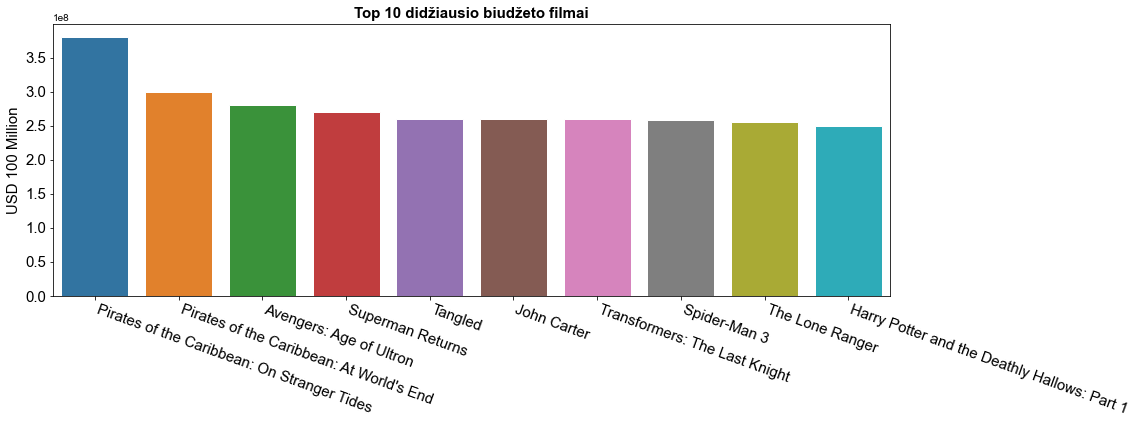

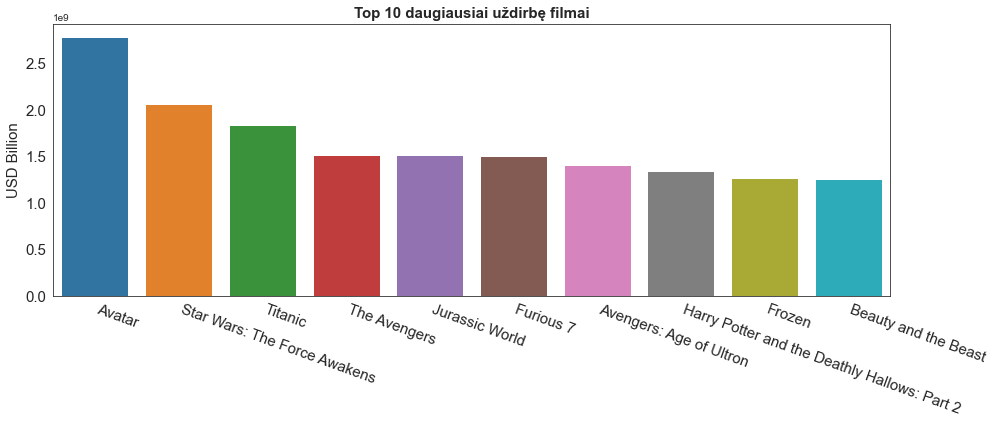

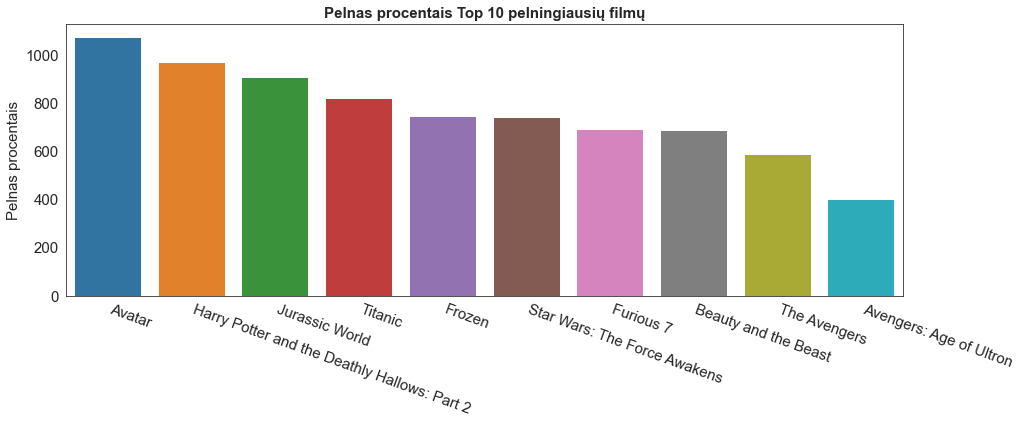

In [38]:
stulpeliai = ['title', 'budget']
biudžetas = movies_clean.sort_values('budget', ascending=False)[stulpeliai].set_index('title')
top_10_biudžetas = biudžetas.head(10)

fig, ax = plt.subplots(figsize=(15,5))
sns.set_style('white')
sns.barplot(data=top_10_biudžetas, x=top_10_biudžetas.index, y='budget');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.xlabel(''); plt.ylabel('USD 100 Million', fontsize=15 );
plt.title('Top 10 didžiausio biudžeto filmai', fontsize=15, weight = 'bold' );

stulpeliai = ['title', 'revenue']
uždarbis = movies_clean.sort_values('revenue', ascending=False)[stulpeliai].set_index('title')
top_10_uždarbis = uždarbis.head(10)

fig, ax = plt.subplots(figsize=(15,5))
sns.set_style('white')
sns.barplot(data=top_10_uždarbis, x=top_10_uždarbis.index, y='revenue');
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.xlabel(''); plt.ylabel('USD Billion', fontsize=15);
plt.title('Top 10 daugiausiai uždirbę filmai', fontsize=15, weight = 'bold' );

pelnas = movies_clean['revenue'] - movies_clean['budget']
pelnas.name = 'profit'
pelnas = movies_clean.join(pelnas)[['title', 'budget', 'revenue', 'profit']].sort_values('profit', ascending=False)
top_10_pelnas = pelnas.head(10).set_index('title')

pelnas_procentais = (top_10_pelnas['profit'] / top_10_pelnas['budget'] * 100)
pelnas_procentais = pelnas_procentais.sort_values(ascending=False).to_frame().rename(columns={0:'Pelnas procentais'})

fig, ax = plt.subplots(figsize=(15,5))
sns.set_style('white')
sns.barplot(data=pelnas_procentais, x=pelnas_procentais.index, y='Pelnas procentais')
plt.xticks(ha='left', rotation=-20, fontsize=15); plt.yticks(fontsize=15)
plt.xlabel(''); plt.ylabel('Pelnas procentais', fontsize=15);
plt.title('Pelnas procentais Top 10 pelningiausių filmų', fontsize=15, weight = 'bold');

Didžiausio biudžeto filmas 'Karibų piratai:ant keistų bangų'
Didžiausio uždarbio filmas 'Avataras'
Didžiausio biudžeto ir didžiausio uždarbio diagramose matome, kad pasikartoja tik 2 filmai, todėl teigti, kad daugiausiai uždirba didžiausio biudžeto filmai nėra visai teisinga :)  
Pelningiausias filmas 'Avataras'.
Neįtikėtina, kaip sėkmingi filmai uždirba daugiau nei jų biudžetas. Avataras uždirbo 10 kartų daugiau nei buvo jo biudžetas. „Avengers: Age of Ultron“, šio sąrašo apačioje, beveik 4 kartus viršijo savo biudžetą.


In [132]:
movies_clean[movies_clean['title']== 'Avatar']

budget  genres     id original_language original_title  \
14617  237000000.0  Action  19995                en         Avatar   

       popularity     production_companies      production_countries  \
14617  185.070892  Ingenious Film Partners  United States of America   

      release_date       revenue  runtime spoken_languages   title  \
14617   2009-12-10  2.787965e+09    162.0          English  Avatar   

       vote_average  vote_count  \
14617           7.2     12114.0   

                                                    cast  \
14617  [{'cast_id': 242, 'character': 'Jake Sully', '...   

                                                    crew  year       director  \
14617  [{'credit_id': '52fe48009251416c750aca23', 'de...  2009  James Cameron   

      director_gender  
14617            male

## Kurie filmai buvo nuostolingi? 

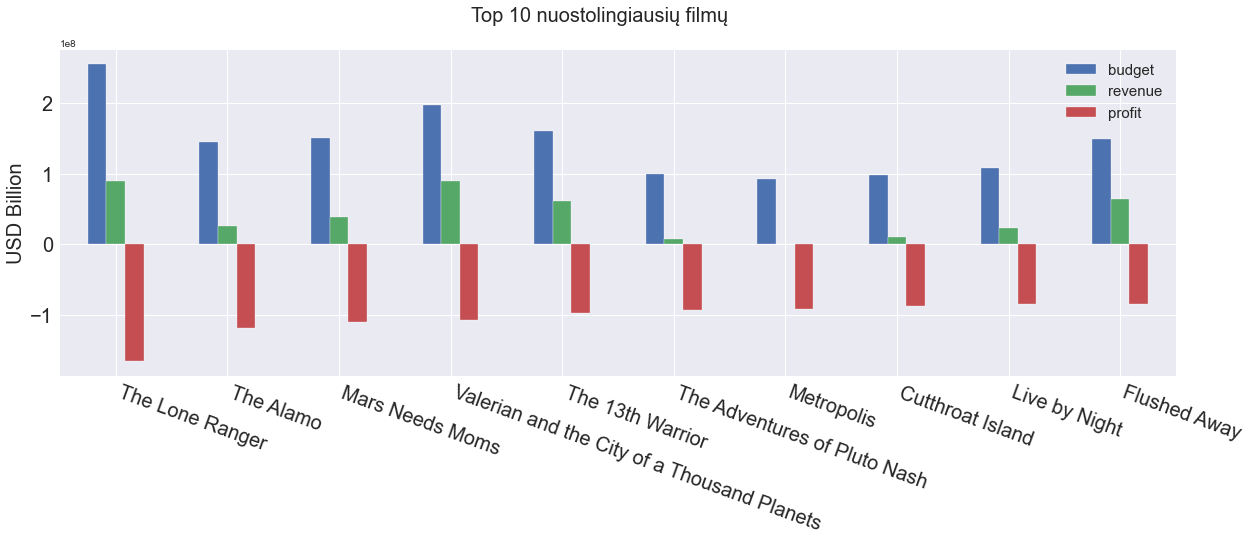

In [39]:
top_10_nuostolis = pelnas[pelnas['revenue'] > 0].tail(10).sort_values(['profit', 'revenue']).set_index('title')

plt.style.use('seaborn')
top_10_nuostolis.plot(kind='bar', figsize=(20,6), fontsize=20)
plt.ylabel('USD Billion', fontsize=20); plt.xlabel('')
plt.xticks(rotation=-20, ha='left')
plt.suptitle('Top 10 nuostolingiausių filmų', fontsize=20)
plt.legend(fontsize=15);

Šiek tiek nustebau pamaciusi „The Lone Ranger“ šio sąrašo viršuje. Nors nežiūrėjau šio filmo, žinojau, kad jame vaidina Johnny Depp'as, ir maniau, kad jis buvo sėkmingas. Vadinasi ne visada geras ir žinomas pagrindinis aktorius garantuoja filmui sėkmę. 

In [129]:
movies_clean[movies_clean['title']== 'The Lone Ranger']

budget     genres      id original_language   original_title  \
5029           0.0  Adventure  108266                en  The Lone Ranger   
21247  255000000.0     Action   57201                en  The Lone Ranger   

       popularity  production_companies      production_countries  \
5029     0.889869   Wrather Productions  United States of America   
21247   12.729104  Walt Disney Pictures  United States of America   

      release_date     revenue  runtime spoken_languages            title  \
5029    1956-02-25         0.0     86.0          English  The Lone Ranger   
21247   2013-07-03  89289910.0    149.0          English  The Lone Ranger   

       vote_average  vote_count  \
5029            6.1         7.0   
21247           5.9      2361.0   

                                                    cast  \
5029   [{'cast_id': 2, 'character': 'The Lone Ranger'...   
21247  [{'cast_id': 4, 'character': 'Tonto', 'credit_...   

                                                    crew  year  \
5029   [{'credit_id': '52fe4a94c3a36847f81d632b', 'de...  1956   
21247  [{'credit_id': '52fe4928c3a36847f818be95', 'de...  2013   

             director director_gender  
5029   Stuart Heisler            male  
21247  Gore Verbinski            male

## Kurie režisieriai yra sukūrę daugiausiai filmų? 

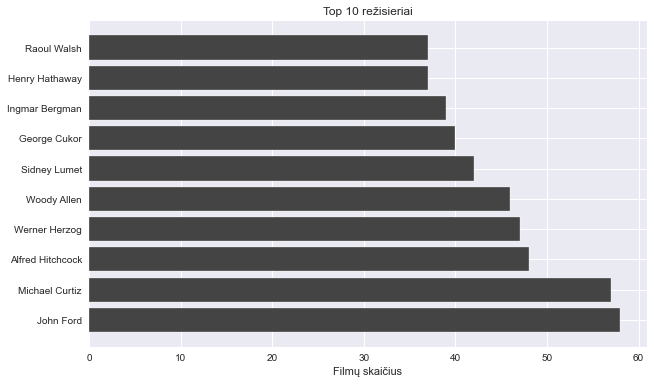

In [40]:
plt.figure(figsize=[10,6])
top_dir = movies_clean.director.value_counts().head(10).index
count = movies_clean.director.value_counts().head(10)

plt.barh(top_dir, count, color='#444444')

plt.title('Top 10 režisieriai')
plt.xlabel('Filmų skaičius');

Smagu matyti kad naujoji karta dar nepasivijo senosios kartos,  daugiausiai filmu sukurę režisieriai yra senosios kartos kurejai, tokiu filmų kaip 12 įtūžusių vyriškių (1957m.) Kasablanka (1942 m.) Psichopatas(1960 m.). Iš produktyviausių režisierių Top 10 tik 2 režisieriai yra dar gyvi, tai Woody Allen (86metai) ir Werner Herzog (79m)
Kitas idomus dalykas yra tas, kad nors ir amerika garseja savo filmu industrija taciau 4 is 10  sio saraso rezisieriu nera amerikieciai: 
Michaelas Curtizas buvo vengrų kilmės amerikiečių kino režisierius;
Alfredas Hičkokas – kino režisierius ir prodiuseris, kilęs iš Didžiosios Britanijos
Werneris Herzogas yra vokiečių kino režisierius
Ernstas Ingmaras Bergmanas – garsus švedų teatro ir kino režisierius,
Taip pat produktyviausių režisierių sarase nera moteru...

## Kokio žanro filmų yra kuriama daugiausiai?

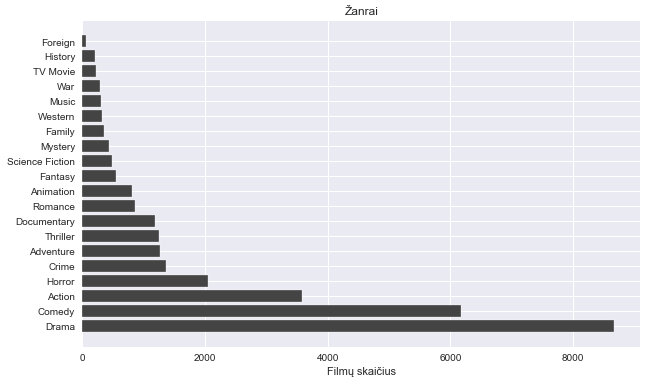

In [41]:
plt.figure(figsize=[10,6])
zanras = movies_clean.genres.value_counts().index
count = movies_clean.genres.value_counts()
plt.barh(zanras, count, color='#444444')

plt.title('Žanrai')
plt.xlabel('Filmų skaičius');

## Kokie žodžiai yra dažniausiai pasikartojantys filmų pavadinimuose?

<Figure size 1440x576 with 0 Axes>

(-0.5, 3999.5, 1999.5, -0.5)

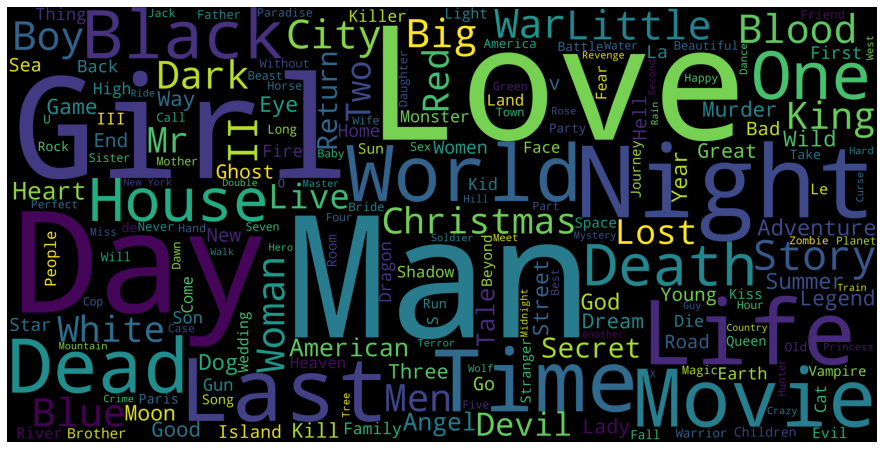

In [123]:
original_corpus = ' '.join(movies_clean['title'])

title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(original_corpus)
plt.figure(figsize=(20,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

## Kurie filmai TMDB bendruomenės įvertinti geriausiai?

In [118]:
movies_clean[movies_clean['vote_count'] > 5000][['title', 'vote_average', 'vote_count' ,'year', 'popularity']].sort_values('vote_average', ascending=False).head(10)

title  vote_average  vote_count  year  popularity
314    The Shawshank Redemption           8.5      8358.0  1994   51.645403
837               The Godfather           8.5      6024.0  1972   41.109264
292                Pulp Fiction           8.3      8670.0  1994  140.950236
12525           The Dark Knight           8.3     12269.0  2008  123.167259
2854                 Fight Club           8.3      9678.0  1999   63.869599
18537          The Intouchables           8.2      5410.0  2011   16.086919
351                Forrest Gump           8.2      8147.0  1994   48.307194
1163    The Empire Strikes Back           8.2      5998.0  1980   19.470959
256                   Star Wars           8.1      6778.0  1977   42.149697
46                        Se7en           8.1      5915.0  1995   18.457430

„Shawshank Redemption“ ir „The Godfather“ yra du geriausiai TMDB bendruomenės įvertinti filmai. Įdomu tai, kad jie taip pat yra 2 geriausi filmai IMDB 250 geriausių filmų sąraše. Taip pat, įdomu tai, kad 8 iš 10 geriausiai įvertintų filmų buvo išleisti dar prieš 2000m.

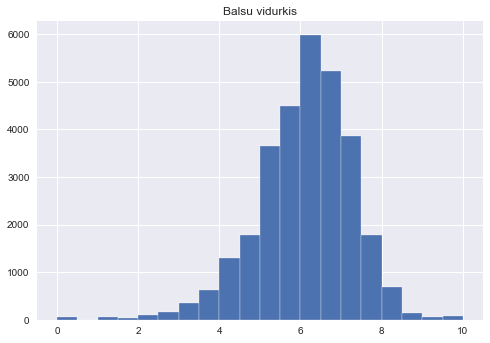

In [44]:
vote_avg=np.arange(0,10+0.5,0.5)
plt.hist(data=movies_clean, x='vote_average',bins=vote_avg);
plt.title('Balsu vidurkis');

## Kaip kito filmų ilgis bėgant metams? 

<AxesSubplot:xlabel='year', ylabel='runtime'>

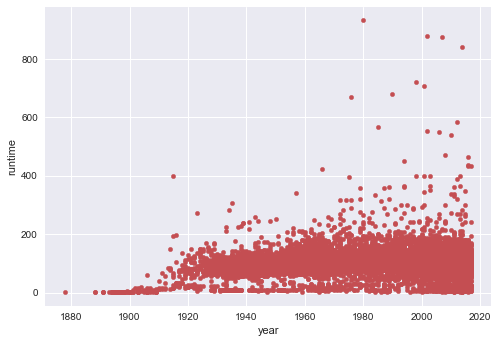

In [97]:
movies_clean.plot.scatter(x='year', y = 'runtime', color=base_color)

In [99]:
movies_clean[movies_clean.runtime > 800]

budget           genres      id original_language  \
13824     0.0            Drama   45560                de   
19230     0.0      Documentary  208988                en   
26763     0.0  Science Fiction  150004                en   
34744     0.0          History  293603                en   

                            original_title  popularity production_companies  \
13824                Berlin Alexanderplatz    2.255785         Bavaria Film   
19230                              The War    0.487489                  PBS   
26763                                Taken   10.628230       DreamWorks SKG   
34744  The Roosevelts: An Intimate History    0.824032     Florentine Films   

           production_countries release_date  revenue  runtime  \
13824                   Germany   1980-08-28      0.0    931.0   
19230  United States of America   2007-09-23      0.0    874.0   
26763  United States of America   2002-12-02      0.0    877.0   
34744  United States of America   2014-09-15      0.0    840.0   

      spoken_languages                                title  vote_average  \
13824          Deutsch                Berlin Alexanderplatz           8.4   
19230          English                              The War           5.3   
26763          English                                Taken           7.4   
34744          English  The Roosevelts: An Intimate History           8.3   

       vote_count                                               cast  \
13824         5.0  [{'cast_id': 2, 'character': 'Franz Biberkopf'...   
19230         3.0  [{'cast_id': 3, 'character': 'Narrator', 'cred...   
26763        76.0  [{'cast_id': 1, 'character': 'Allie Keys', 'cr...   
34744         6.0  [{'cast_id': 0, 'character': 'Eleanor Roosevel...   

                                                    crew  year  \
13824  [{'credit_id': '5653d1dac3a36850fc001c27', 'de...  1980   
19230  [{'credit_id': '52fe4d58c3a368484e1e43a5', 'de...  2007   
26763  [{'credit_id': '54177f100e0a2637ef0002e0', 'de...  2002   
34744  [{'credit_id': '541f65a70e0a261794000b7f', 'de...  2014   

                       director director_gender  
13824  Rainer Werner Fassbinder            male  
19230                 Ken Burns            male  
26763              John Fawcett            male  
34744                 Ken Burns            male

## Kino pramone valdo vyrai?

In [107]:
gender= pd.DataFrame(movies_clean['director_gender'].value_counts())
gender

director_gender
male               19366
unknown             9955
female              1118

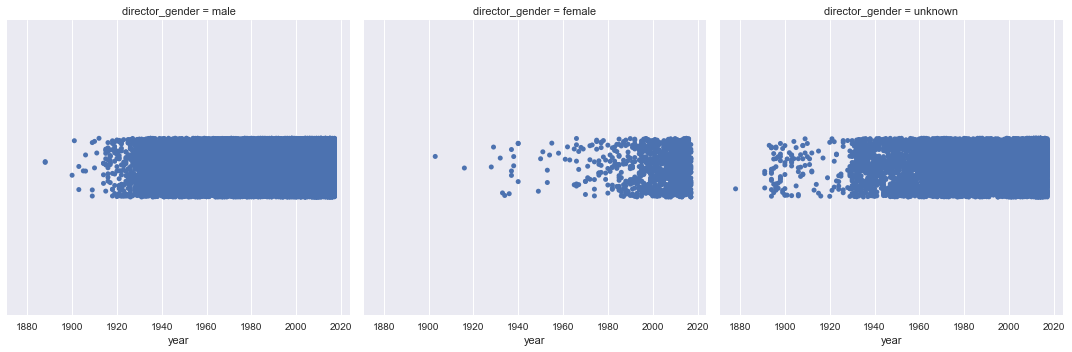

In [45]:
sns.catplot(x="year", hue="director_gender", col="director_gender", data=movies_clean, kind="strip", legend=True);

Nors ir neturime visų režisierių lyties duomenų, gana akivaizdu, kad moterų visame pasaulyje filmų kūrimo pramonėje yra mažuma. Tačiau galime pastebėti kintantį augimą 2000 m. 

In [106]:
movies_clean[movies_clean['director_gender']== 'female'][['title', 'vote_count', 'vote_average', 'director_gender', 'director', 'popularity','year']].sort_values('popularity', ascending=False).head(10)


title  vote_count  vote_average director_gender  \
33435            Wonder Woman      5025.0           7.2          female   
44338           The Bad Batch       160.0           5.3          female   
43710            The Beguiled       279.0           5.8          female   
36298           Me Before You      2674.0           7.6          female   
2466               The Matrix      9079.0           7.9          female   
27559    Fifty Shades of Grey      3350.0           5.2          female   
13177                Twilight      3688.0           5.8          female   
23962       Jupiter Ascending      2816.0           5.2          female   
41572  Underworld: Blood Wars      1619.0           5.2          female   
8215               Shark Tale      1612.0           5.8          female   

                  director  popularity  year  
33435        Patty Jenkins  294.337037  2017  
44338    Ana Lily Amirpour   78.807200  2017  
43710        Sofia Coppola   36.260510  2017  
36298        Thea Sharrock   34.347590  2016  
2466        Lana Wachowski   33.366332  1999  
27559   Sam Taylor-Johnson   33.068431  2015  
13177  Catherine Hardwicke   31.282029  2008  
23962      Lilly Wachowski   21.463465  2015  
41572        Anna Foerster   20.029760  2016  
8215          Vicky Jenson   17.999273  2004